In [184]:
# Information about dataset attributes -

# Pregnancies: To express the Number of pregnancies

# Glucose: To express the Glucose level in blood

# BloodPressure: To express the Blood pressure measurement

# SkinThickness: To express the thickness of the skin

# Insulin: To express the Insulin level in blood

# BMI: To express the Body mass index

# DiabetesPedigreeFunction: To express the Diabetes percentage

# Age: To express the age

# Outcome: To express the final result 1 is Yes and 0 is No

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [186]:
df=pd.read_csv("diabetes.csv")

In [187]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [189]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [190]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [191]:
df=df[(df['Glucose']!=0)]

In [192]:
df=df[(df['BMI']!=0)]

In [193]:
df=df[(df['BloodPressure']!=0)]

In [194]:
df=df[(df['Insulin']!=0)]

In [195]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
Glucose,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
BloodPressure,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
SkinThickness,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
Insulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
BMI,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
DiabetesPedigreeFunction,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
Age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00
Outcome,392.0,0.331633,0.471401,0.000,0.00000,0.0000,1.000,1.00


In [196]:
df.skew()

Pregnancies                 1.335596
Glucose                     0.517850
BloodPressure              -0.087516
SkinThickness               0.209311
Insulin                     2.165116
BMI                         0.663485
DiabetesPedigreeFunction    1.959101
Age                         1.403607
Outcome                     0.717990
dtype: float64

<Axes: >

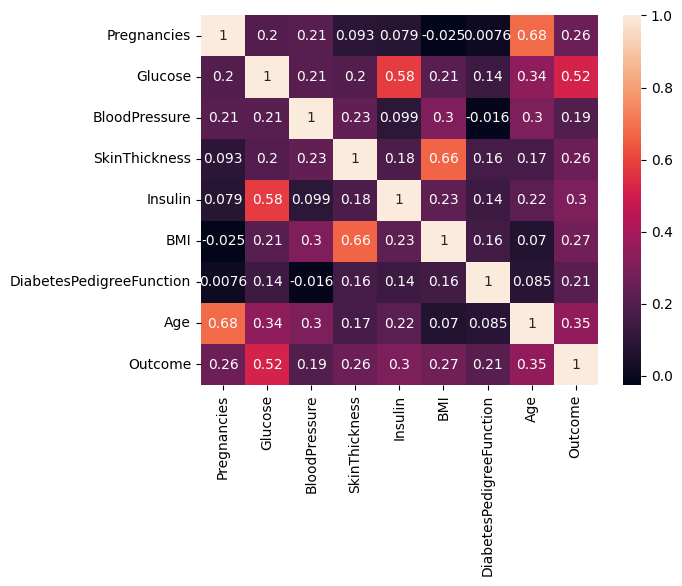

In [197]:
sns.heatmap(df.corr(),annot=True)

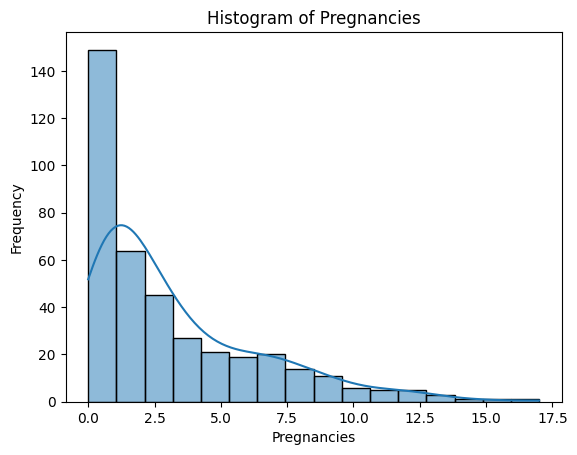

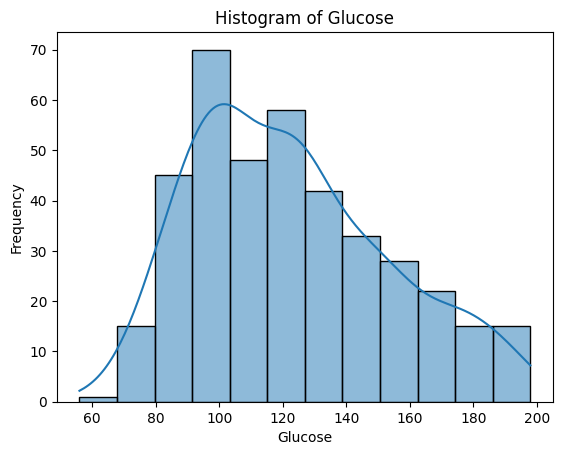

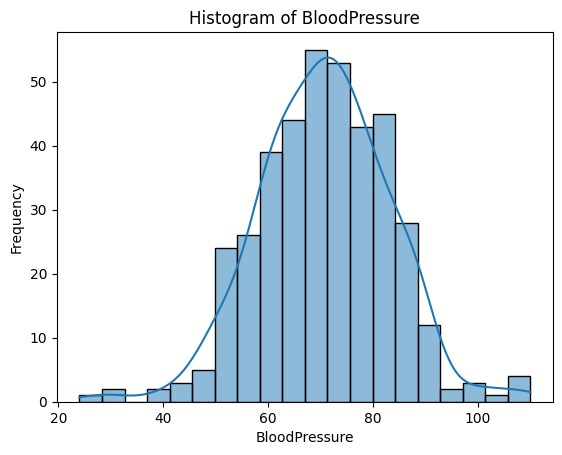

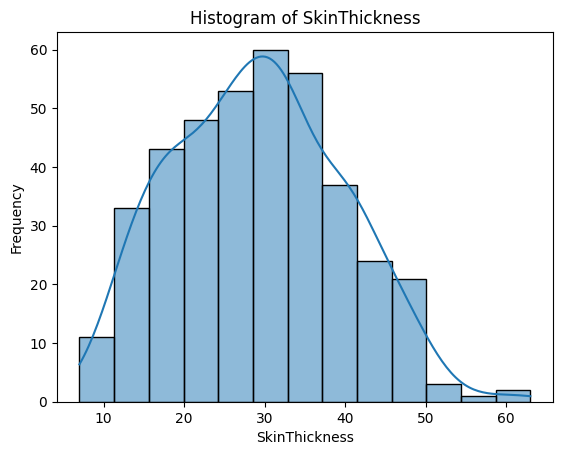

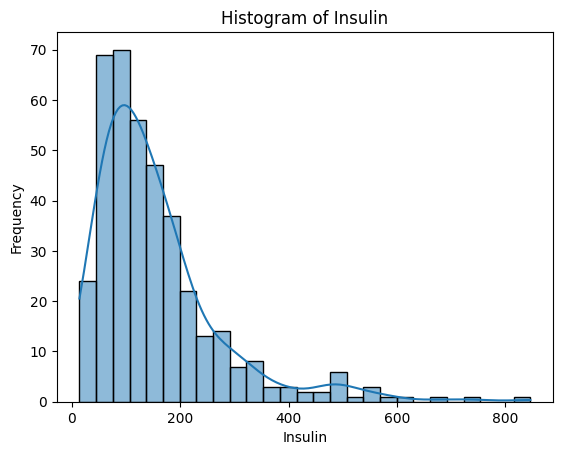

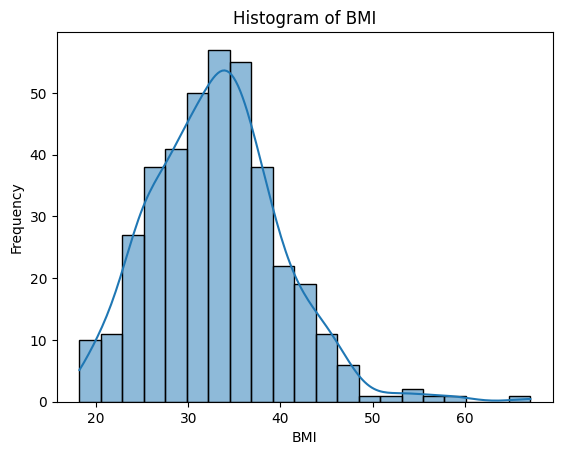

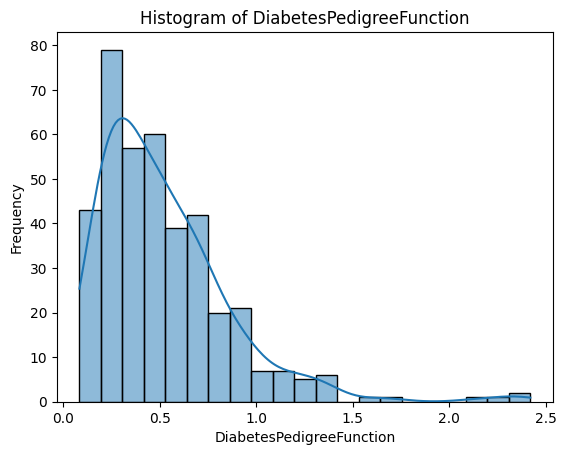

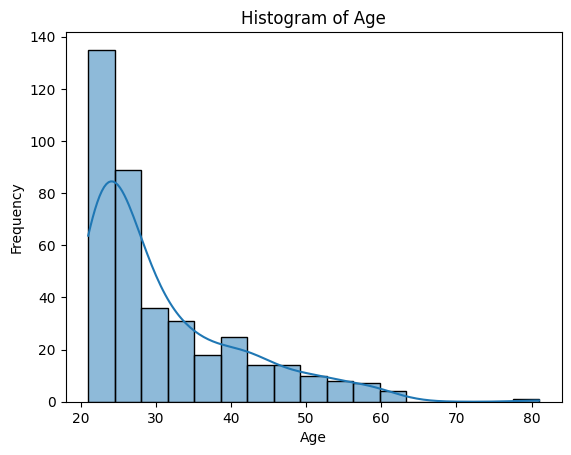

In [198]:
for col in df.columns[:-1]:  # Exclude the last column
    plt.figure()  # Create a new figure for each histogram
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [199]:
for i in df.columns[:-1]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower bound and upper bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers and update the DataFrame
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [200]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2,random_state=101)

In [201]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_ss=ss.fit_transform(x_train)
x_test_ss=ss.transform(x_test)

In [226]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model1=RandomForestClassifier()
model= SVC(kernel='sigmoid', C=1, random_state=42)

model.fit(x_train_ss,y_train)
y_pred=model.predict(x_test_ss)

In [227]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[45  5]
 [ 8  7]]
0.8


In [228]:
import pickle
filename="diabetes_prediction.pkl"
pickle.dump(model,open(filename,'wb'))